In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

from plotly import express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [ ]:
data = pd.read_excel('/content/only_ratios_Data_botola_20_21.xlsx')

In [ ]:
data.dtypes


Source.Name                                   object
Date                                          object
Match                                         object
Goals                                          int64
xG                                           float64
Ratio_On_Target/Shots                        float64
Ratio_Accurate/Passes                        float64
Possession%                                  float64
 Losses_Low                                    int64
Losses_Medium                                  int64
Losses_ High                                   int64
Recoveries_ Low                                int64
Recoveries_Medium                              int64
Recoveries_High                                int64
Ratio_Won/Duels                              float64
Ratio_from_outside_penalty_area/on_target    float64
Ratio_Positional_attacks_with shots          float64
Ratio_Counterattacks/with shots              float64
Ratio_Set pieces/with shots                  f

In [ ]:
data.Date = pd.to_datetime(data.Date)

In [ ]:
data_wac = data[data['Source.Name'] == 'Team Stats Wydad Casablanca (8).xlsx']
data_rca = data[data['Source.Name'] == 'Team Stats Raja Casablanca.xlsx']
data_far = data[data['Source.Name'] == 'Team Stats FAR Rabat.xlsx']
data_top_3 = data[data['Source.Name'].isin(['Team Stats FAR Rabat.xlsx','Team Stats Raja Casablanca.xlsx','Team Stats Wydad Casablanca (8).xlsx'])]
data_not_wac = data[data['Source.Name'] != 'Team Stats Wydad Casablanca (8).xlsx']


In [ ]:
top_3 = [data_wac, data_rca , data_far]
lb = []
for i in top_3 :
  l = list(i.index)
  lb = lb +l
  
not_top_3 = data.drop(labels = lb)

In [ ]:
Tickers = ['wac', 'rca', 'fus', 'far']
Indexes = L[-6:]
datasets = [data_wac , data_rca, data_fus, data_far]


for index in Indexes : 
  plots = []
  for dataset,ticker in zip(datasets,Tickers) :
    plot = go.Scatter(x = dataset.Date, y = dataset[index], mode = "markers + lines", name = ticker + index )
    plots.append(plot)

  fig = go.Figure(data = plots)
  fig.update_layout(height = 800, width = 1800, title_text = "Comparaison footballistique", xaxis_title = 'Days', yaxis_title = 'Indice Analytique')
  fig.show()

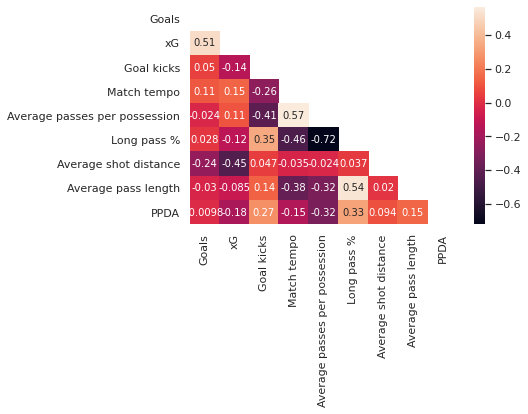

In [ ]:
matrix = np.triu(data_not_wac[['Goals','xG','Goal kicks','Match tempo','Average passes per possession','Long pass %','Average shot distance','Average pass length','PPDA']].corr())
ax = sns.heatmap(data_not_wac[['Goals','xG','Goal kicks','Match tempo','Average passes per possession','Long pass %','Average shot distance','Average pass length','PPDA']].corr(), annot = True , mask=matrix)

In [ ]:
import numpy as np

In [ ]:
data_wac.corr()['xG']

Goals                            0.668054
xG                               1.000000
Total_Shots                      0.694347
Shots_On_Target                  0.807782
Ratio_On_Target/Shots            0.487609
                                   ...   
Average passes per possession    0.020351
Long pass %                     -0.111458
Average shot distance           -0.539512
Average pass length              0.157370
PPDA                            -0.081215
Name: xG, Length: 103, dtype: float64

In [ ]:
# plot of correaltion BPL_B | colummns
cols = [col for col in data.columns[4:] if col != "xG"]

arrCorr = []
for col in cols:
  arrCorr.append(np.corrcoef(data["xG"], data[col])[0][1])

# we will consider that a columns is important if it exceeds the mean of correlations
meanCorr = sum([abs(corr) for corr in arrCorr]) / len(arrCorr)
threshold = meanCorr

fig = go.Figure(data=[
                      go.Scatter(x=cols, y=arrCorr, mode="markers + lines", name="correlation"),
                      go.Scatter(x=cols, y=[threshold for i in arrCorr], name="mean correlation", line=dict(color="#EF553B"), fill='tozeroy'),
                      go.Scatter(x=cols, y=[-threshold for i in arrCorr], name="mean correlation", line=dict(color="#EF553B"), fill='tozeroy', showlegend=False)

])

fig.show()

In [ ]:
# plot of correaltion BPL_B | colummns
cols = [col for col in data.columns[4:] if col != "xG"]

arrCorr = []
for col in cols:
  arrCorr.append(np.corrcoef(data_wac["xG"], data_wac[col])[0][1])

# we will consider that a columns is important if it exceeds the mean of correlations
meanCorr = sum([abs(corr) for corr in arrCorr]) / len(arrCorr)
threshold = meanCorr

fig = go.Figure(data=[
                      go.Scatter(x=cols, y=arrCorr, mode="markers + lines", name="correlation", line_color='#ff0000' , showlegend=False),
                      go.Scatter(x=cols, y=[threshold for i in arrCorr], name="Correlation Moyenne", line=dict(color="#EF553B"), fill='tozeroy'),
                      go.Scatter(x=cols, y=[-threshold for i in arrCorr], name="mean correlation", line=dict(color="#EF553B"), fill='tozeroy', showlegend=False)

])

fig.update_layout(
    title="Correlation des variables explicatives avec la variable xG pour le WAC", title_x=0.5
)


fig.show()

In [ ]:
# plot of correaltion BPL_B | colummns
cols = [col for col in data_not_wac.columns[4:] if col != "xG"]

arrCorr = []
for col in cols:
  arrCorr.append(np.corrcoef(data_not_wac["xG"], data_not_wac[col])[0][1])

# we will consider that a columns is important if it exceeds the mean of correlations
meanCorr = sum([abs(corr) for corr in arrCorr]) / len(arrCorr)
threshold = meanCorr

fig = go.Figure(data=[
                      go.Scatter(x=cols, y=arrCorr, mode="markers + lines", name="correlation", showlegend=False),
                      go.Scatter(x=cols, y=[threshold for i in arrCorr], name="Correlation Moyenne", line=dict(color="#EF553B"), fill='tozeroy'),
                      go.Scatter(x=cols, y=[-threshold for i in arrCorr], name="mean correlation", line=dict(color="#EF553B"), fill='tozeroy', showlegend=False)

])

fig.update_layout(
    title="Correlation des variables explicatives avec la variable xG pour l'équipe fictive du rang 9", title_x=0.5
)

fig.show()

In [ ]:
all_ratios = []
for i in list(data.columns) : 
  if 'Ratio' in i : 
    all_ratios.append(i)

In [ ]:
cleaned = data[['Ratio_On_Target/Shots','Ratio_Accurate/Passes','Ratio_Won/Duels','Ratio_from_outside_penalty_area/on_target','Ratio_Positional_attacks_with shots','Ratio_Counterattacks/with shots','Ratio_Set pieces/with shots','Ratio_Corners/with shots','Ratio_Free_kicks/with_shots','Ratio_Converted/Penalties','Ratio_Accurate/Crosses','Ratio_Offensive_duels/won','Ratio_Shots_against/on_target', 'Ratio_Defensive duels/won','Ratio_Aerial_duels/won','Ratio_Sliding_tackles/successful', 'Ratio_Forward_passes/accurate','Ratio_Back passes/accurate', 'Ratio_Lateral passes/accurate', 'Ratio_Long passes/accurate', 'Ratio_Passes to final third/accurate','Ratio_Progressive_passes/accurate','Ratio_Smart passes/accurate','Ratio_Throw ins/accurate','xG','Goal kicks','Match tempo','Average passes per possession','Long pass %','Average shot distance','Average pass length','PPDA']]

In [ ]:
data_wac.corr().xG[2:]/data_not_wac.corr().xG[2:]

Ratio_On_Target/Shots                        2.931251
Ratio_Accurate/Passes                        0.430951
Possession%                                  0.261733
 Losses_Low                                  0.117375
Losses_Medium                                0.596329
Losses_ High                                 0.464606
Recoveries_ Low                              0.357544
Recoveries_Medium                           -0.148412
Recoveries_High                              0.485781
Ratio_Won/Duels                              1.260994
Ratio_from_outside_penalty_area/on_target    7.599754
Ratio_Positional_attacks_with shots          1.493271
Ratio_Counterattacks/with shots              1.472971
Ratio_Set pieces/with shots                  0.884529
Ratio_Corners/with shots                     0.648949
Ratio_Free_kicks/with_shots                 -0.627289
Ratio_Converted/Penalties                    1.394873
Ratio_Accurate/Crosses                       0.186871
Deep completed crosses      

In [ ]:
cols_not_wac = [col for col in data_not_wac.columns[4:] if col != "xG"]
cols_wac = [col for col in data_wac.columns[4:] if col != "xG"]

ratios = []
for col_wac,col_not_wac in zip(cols_wac,cols_not_wac):
  a = np.corrcoef(data_not_wac["xG"], data_not_wac[col_not_wac])[0][1]
  b = np.corrcoef(data_wac["xG"], data_wac[col_wac])[0][1]
  ratios.append(a/b)

In [ ]:
ratios 

[0.34115121368002627,
 2.3204521096745405,
 3.820687766978096,
 8.519698395996084,
 1.6769258636070254,
 2.152363247426745,
 2.796860892285751,
 -6.7379927529588866,
 2.058541617873119,
 0.793025001612351,
 0.13158321161797784,
 0.669670876885132,
 0.6789000281827744,
 1.1305454148508844,
 1.5409541868448668,
 -1.5941626260049566,
 0.7169113804529499,
 5.351270900125036,
 1.8679443756964673,
 2.4912379035873924,
 1.0659344144254415,
 0.6211870522575014,
 1.376120960539152,
 1.8716884668822995,
 -1.654559597254104,
 1.487678662611716,
 1.4011855752976405,
 0.13904998502895374,
 2.40485260967347,
 1.2149844767253495,
 -3.954682539860265,
 -0.35130021537470946,
 2.602400420083058,
 0.6269488812782202,
 -7.410828369671824,
 1.4628416172228638,
 0.1269115681703542,
 -1.6274230126779952,
 6.094516544094776,
 2.3014418285124227,
 2.8946210014259353,
 0.151578927904569,
 0.5891524008830985,
 5.312898277326789,
 1.1019463581160094,
 0.8324088743949386,
 -0.5428605873118573,
 2.244629115691348]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ac3172a10>]],
      dtype=object)

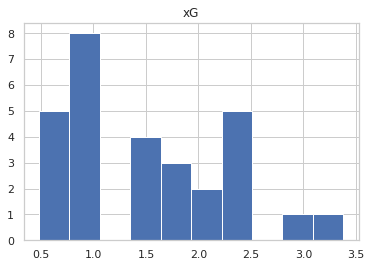

In [ ]:
data_rca.hist(column= 'xG',bins=10)

In [ ]:
not_top_3.hist(column= 'xG',bins=10,)

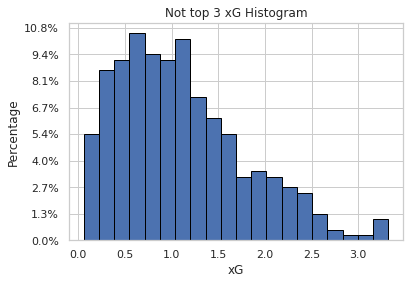

In [ ]:
data = not_top_3.xG # generate random numbers from a gaussian distribution
fig, ax = plt.subplots()
ax.hist(data, bins=num_of_bins, edgecolor='black')
ax.set_title("Not top 3 xG Histogram")
ax.set_xlabel("xG")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data)))
plt.show()

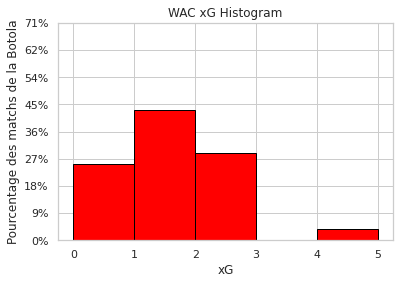

In [ ]:
from matplotlib import ticker

plotini = data_wac.xG # generate random numbers from a gaussian distribution
fig, ax = plt.subplots()
ax.hist(plotini, bins=5, edgecolor='black', range= [0,5],color= 'red',stacked=True)
ax.set_title("WAC xG Histogram")
ax.set_xlabel("xG")
ax.set_ylabel("Pourcentage des matchs de la Botola")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(plotini)))
plt.ylim((0,20))
plt.show()

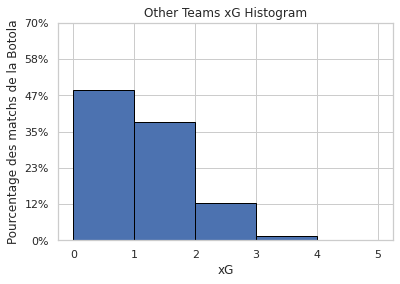

In [ ]:
 # generate random numbers from a gaussian distribution
fig, aax = plt.subplots()
aax.hist(data_not_wac.xG, bins=5, edgecolor='black',range= [0,5] )
aax.set_title("Other Teams xG Histogram")
aax.set_xlabel("xG")
aax.set_ylabel("Pourcentage des matchs de la Botola")
aax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data_not_wac)))
plt.ylim((0,300))
plt.show()

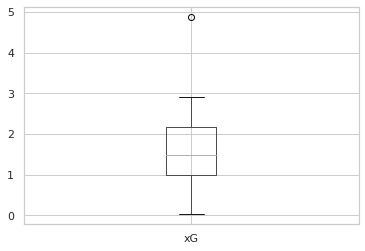

In [ ]:
data_wac.boxplot(column = 'xG')

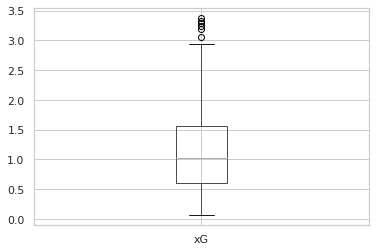

In [ ]:
data_not_wac.boxplot(column = 'xG')